In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
zdata = pd.read_csv("Zomato Chennai Listing 2020.csv")
zdata.head(6)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
5,https://www.zomato.com/chennai/dine-n-fun-meda...,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"['South Indian', ' North Indian', ' Chinese']","['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,4.1,567,3.8,24700,"['Home Delivery', 'Indoor Seating']"


In [41]:
zdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          12032 non-null  object 
 8   Dining Rating Count    12032 non-null  object 
 9   Delivery Rating        12032 non-null  object 
 10  Delivery Rating Count  12032 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [42]:
zdata['count']=1
a=zdata.groupby(['Name of Restaurant']).count()['count']
b=a.sort_values(ascending=False)
most_branches=b[0:6]

most_branches

Name of Restaurant
Amma Unavagam      78
CK's Bakery        71
Domino's Pizza     66
Lassi Shop         58
OYALO              51
Cafe Coffee Day    51
Name: count, dtype: int64

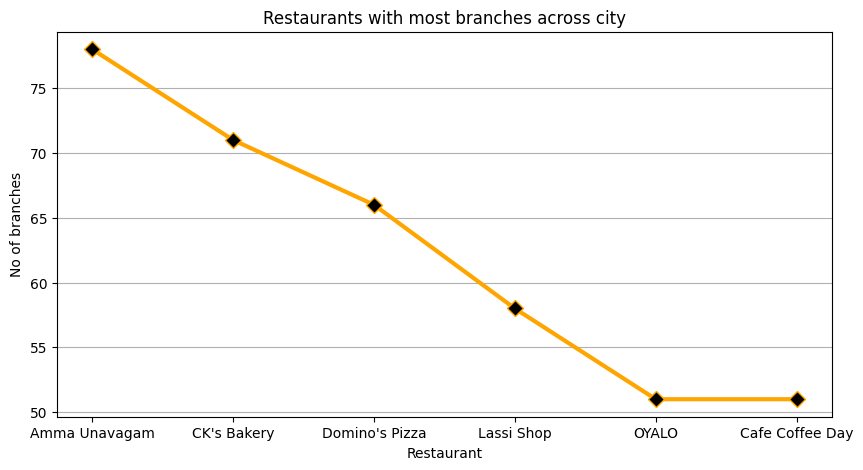

In [43]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(most_branches,color='orange',linewidth=3,marker="D",markerfacecolor='black',markersize=8)
plt.xlabel('Restaurant')
plt.ylabel('No of branches')
plt.title('Restaurants with most branches across city')
plt.grid(axis='y')

In [44]:
print(zdata.isnull().sum().sort_values(ascending=False))

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
count                    0
dtype: int64


In [45]:
zdata.describe()

,Price for 2,count
count,12032.000000,12032.0
mean,397.611370,1.0
std,332.045938,0.0
min,40.000000,1.0
25%,200.000000,1.0
50%,300.000000,1.0
75%,450.000000,1.0
max,5000.000000,1.0


In [46]:
import pandas as pd


zdata['Dining Rating'] = pd.to_numeric(zdata['Dining Rating'], errors='coerce')
zdata['Delivery Rating'] = pd.to_numeric(zdata['Delivery Rating'], errors='coerce')


zdata['Average Rating'] = (zdata['Dining Rating'] + zdata['Delivery Rating']) / 2


zdata.drop(['Dining Rating', 'Delivery Rating'], axis=1, inplace=True)

# zdata['Rating Count'] = (zdata['Dining Rating Count'] + zdata['Delivery Rating Count'])/2

# zdata.drop(['Dining Rating Count','Delivery Rating Count'],axis=1,inplace=True)

# Display the modified dataset with the new feature
print(zdata)


                                              Zomato URL  \
0      https://www.zomato.com/chennai/yaa-mohaideen-b...   
1      https://www.zomato.com/chennai/sukkubhai-biriy...   
2      https://www.zomato.com/chennai/ss-hyderabad-bi...   
3            https://www.zomato.com/chennai/kfc-perambur   
4      https://www.zomato.com/chennai/tasty-kitchen-p...   
...                                                  ...   
12027  https://www.zomato.com/chennai/cks-sandwiches-...   
12028  https://www.zomato.com/chennai/cks-sandwiches-...   
12029  https://www.zomato.com/chennai/cks-sandwiches-...   
12030  https://www.zomato.com/chennai/cks-sandwiches-...   
12031  https://www.zomato.com/chennai/cks-sandwiches-...   

          Name of Restaurant  \
0      Yaa Mohaideen Briyani   
1         Sukkubhai Biriyani   
2       SS Hyderabad Biryani   
3                        KFC   
4              Tasty Kitchen   
...                      ...   
12027        CK's Sandwiches   
12028        CK's Sandw

In [47]:
zdata.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating Count,Delivery Rating Count,Features,count,Average Rating
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,1500,9306,"['Home Delivery', 'Indoor Seating']",1,4.30
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,3059,39200,"['Home Delivery', 'Free Parking', 'Table booki...",1,4.25
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,1361,10500,"['Home Delivery', 'Indoor Seating']",1,4.35
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,1101,11200,"['Home Delivery', 'Free Parking', 'Card Upon D...",1,4.00
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,617,22400,"['Home Delivery', 'Indoor Seating']",1,4.15
